In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchwi.utils import plot

In [3]:
def get_data(dirname,shape):
    loss = np.loadtxt(dirname+"/loss.txt",usecols=[0,1])
    vel = np.fromfile(dirname+"/vel.0500",dtype=np.float32)
    return loss, np.reshape(vel,shape)

In [4]:
nx,nz = 576, 188
h = 0.016
shape=(nx,nz)

In [5]:
loss_adam, vel_adam = get_data("../src/time/runs/May18_01-20-34_925924ccf8a8Adam/", shape)
loss_nag,  vel_nag  = get_data("../src/time/runs/May18_02-17-18_925924ccf8a8Nag/", shape)
loss_mnt,  vel_mnt  = get_data("../src/time/runs/May18_04-52-45_925924ccf8a8Momentum/", shape)
loss_gd,   vel_gd   = get_data("../src/time/runs/May18_05-37-14_925924ccf8a8GD/", shape)

Text(0, 0.5, 'Loss')

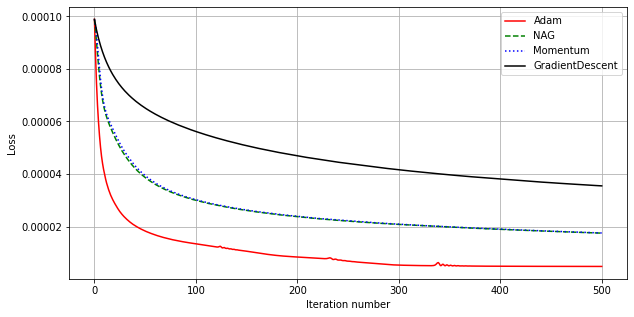

In [7]:
plt.figure(figsize=[10,5])
plt.plot(loss_adam[:,0],loss_adam[:,1],'r-', label="Adam")
plt.plot(loss_nag[:,0], loss_nag[:,1] ,'g--', label="NAG")
plt.plot(loss_mnt[:,0], loss_mnt[:,1] ,'b:', label='Momentum')
plt.plot(loss_gd[:,0], loss_gd[:,1] ,'k-', label='GradientDescent')
plt.grid()
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("Loss")

In [8]:
vmin=1.5
vmax=5.5

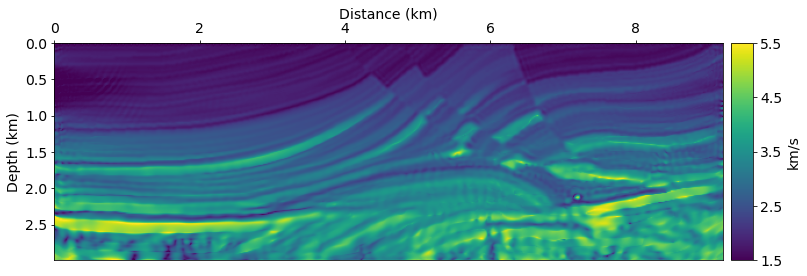

In [9]:
plot.plot_vel(vel_adam, h, vmin, vmax)

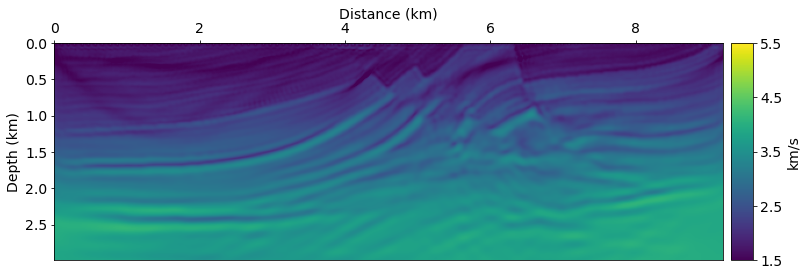

In [10]:
plot.plot_vel(vel_nag, h, vmin, vmax)

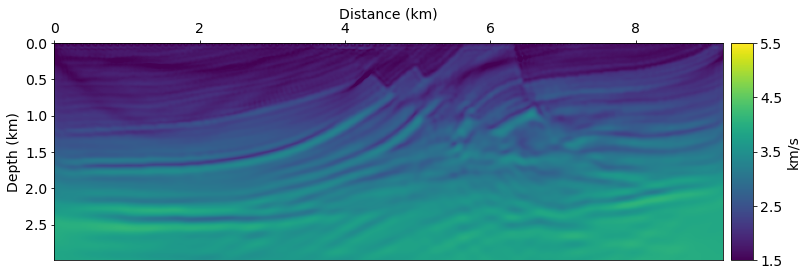

In [11]:
plot.plot_vel(vel_mnt, h, vmin, vmax)

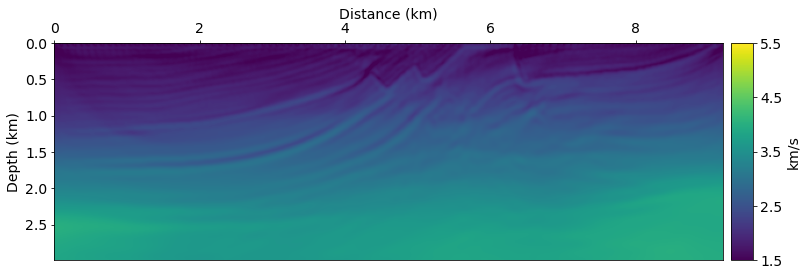

In [12]:
plot.plot_vel(vel_gd, h, vmin, vmax)